## Copernicus Seasonal Forecast Module

This module is developed to manage seasonal forecast data from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu) (CDS) for the [U-CLIMADAPT project](https://www.copernicus-user-uptake.eu/user-uptake/details/responding-to-the-impact-of-climate-change-u-climadapt-488). 
It offers comprehensive tools for downloading, processing, computing climate indices, and generating hazard objects based on seasonal forecast datasets, particularly [Seasonal forecast daily and subdaily data on single levels](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview). 
The module is tailored to integrate seamlessly with the [CLIMADA](https://climada.ethz.ch/)(CLIMate ADAptation) platform, supporting climate risk assessment and the development of effective adaptation strategies.

Features:
- Download seasonal forecast data from CDS
- Process raw data into climate indices
- Calculate various heat-related indices (e.g., Maximum Temperature, Tropical Nights)
- Create CLIMADA Hazard objects for further risk analysis
- Visualize hazard data

Prerequisites:

1. CDS account and API key:
   Register at https://cds.climate.copernicus.eu

2. CDS API client installation:
   pip install cdsapi

3. CDS API configuration:
   Create a .cdsapirc file in your home directory with your API key and URL.
   For instructions, visit: https://cds.climate.copernicus.eu/how-to-api#install-the-cds-api-client

4. Dataset Terms and Conditions: After selecting the dataset to download, make 
   sure to accept the terms and conditions on the corresponding dataset webpage in the CDS portal before running this notebook. Here, https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download.

Usage:
This module is typically imported and used within larger scripts or applications for climate data processing
and risk assessment. See individual function docstrings for specific usage instructions.

Note:
Ensure you have the necessary permissions and comply with the CDS data usage policies when using this module. You can view the terms and conditions at https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download. You can find them at the bottom of the download page.

### Setup and Installation (Google Colab Only)

This section installs and configures all necessary dependencies for running the seasonal forecast module in Google Colab. If you are running this notebook locally, you should install these dependencies manually in your environment instead.
Installed Dependencies:

    - cdsapi: For accessing the Copernicus Climate Data Store (CDS)
    - climada and climada-petals: For climate impact analysis
    - The seasonal forecast module: For processing and analyzing seasonal forecasts



#### Install Copernicus Climate Data Store (CDS) API

In [ ]:
# Set up Copernicus API credentials (DEMONSTRATION PURPOSES ONLY)
# ⚠️ This API key is for demonstration and will no longer be available after this session.
# You must replace this with your own API key to access data from the Copernicus Climate Data Store (CDS).
# To obtain your own API key, register at https://cds.climate.copernicus.eu and follow the API setup instructions.

url = 'url: https://cds.climate.copernicus.eu/api'
key = 'key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api
key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7


In [3]:
!pip install "cdsapi>=0.7.4"

In [5]:
import cdsapi
c = cdsapi.Client(debug=True)

2025-02-28 14:50:08,616 DEBUG GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
2025-02-28 14:50:09,184 DEBUG REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","date":"2024-09-26T00:00:00","summary":null,"url":null,"severity":"info","content":"Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.","live":true},{"id":"sites/cds/2024/2024-06-17-beta-warning1.md","date":"2024-06-16T00:00:00","summary":null,"url":null,"severity":"warning","content":"CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the \"Show API request code\" tool on the dataset Download Form to check you are using the correct syntax for your API request.","live":true}]}
2025-02-28 14:50:09,185 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-28 14:50:09,187 WARNING [2024-06-16T00:00:00] CDS

In [6]:
import cdsapi

client = cdsapi.Client()

dataset = 'reanalysis-era5-pressure-levels'
request = {
  'product_type': ['reanalysis'],
  'variable': ['geopotential'],
  'year': ['2024'],
  'month': ['03'],
  'day': ['01'],
  'time': ['13:00'],
  'pressure_level': ['1000'],
  'data_format': 'grib',
}
target = 'download.grib'

client.retrieve(dataset, request, target)

2025-02-28 14:50:09,753 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-28 14:50:09,754 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-28 14:50:10,305 INFO Request ID is 45485919-f75e-48c0-ab89-f04b4074c956
2025-02-28 14:50:10,487 INFO status has been updated to accepted
2025-02-28 14:50:24,612 INFO status has been updated to successful


1fd5a2b7ad40b8c614c78061a75d30d0.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

'download.grib'

#### Install CLIMADA

In [7]:
# Install CondaColab to enable Conda package management in Google Colab
# This allows installing `climada` using `mamba`
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [8]:
# Mamba install CLIMADA 
!mamba install climada


Looking for: ['climada']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [9]:
# Mamba install CLIMADA 
!mamba install climada-petals


Looking for: ['climada-petals']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



#### Install the Copernicus Forecast module from the CLIMADA Petals repository

In [10]:
# This fetches the latest version from the `feature/copernicus_forecast` branch
!pip install git+https://github.com/CLIMADA-project/climada_petals.git@feature/copernicus_forecast

  Cloning https://github.com/CLIMADA-project/climada_petals.git (to revision feature/copernicus_forecast) to /tmp/pip-req-build-d66yih3d
  Running command git clone --filter=blob:none --quiet https://github.com/CLIMADA-project/climada_petals.git /tmp/pip-req-build-d66yih3d
  Running command git checkout -b feature/copernicus_forecast --track origin/feature/copernicus_forecast
  Switched to a new branch 'feature/copernicus_forecast'
  Branch 'feature/copernicus_forecast' set up to track remote branch 'feature/copernicus_forecast' from 'origin'.
  Resolved https://github.com/CLIMADA-project/climada_petals.git to commit d99862e852c8f640e7ad9efd2570ed711d7821fe
  Preparing metadata (setup.py) ... done


In [11]:
# Import packages

import warnings
import datetime as dt
warnings.filterwarnings('ignore')

from climada.hazard import Hazard
from climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard import SeasonalForecast, month_name_to_number

### get bounds functions under development in climada
if hasattr(__import__("climada").util.coordinates, "bounding_box_global"):
    from climada.util.coordinates import (
        bounding_box_from_cardinal_bounds, bounding_box_global, bounding_box_from_countries
        )
else:
    from climada_petals.hazard.copernicus_interface.temporary_bounding_box_functions import (
        bounding_box_from_cardinal_bounds, bounding_box_global, bounding_box_from_countries
        )

### Set up module parameters

To configure the module for working with Copernicus forecast data and converting it into a hazard object for CLIMADA, you will need to define several essential parameters. These settings are crucial as they specify the type of data to be retrieved, the format, the forecast period, and the geographical area of interest. These parameters influence how the forecast data is processed and transformed into a hazard object.

Below, we outline these parameters and use an example for the "Maximum Temperature" index to demonstrate the seasonal forecast functionality.

To learn more about what these parameters entail and their significance, please refer to the [documentation on the CDS webpage](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).

#### Overview of parameters

**index_metric**: Defines the type of index to be calculated. The current options available are 'HIA' (Heat Index Adjusted), 'HIS' (Heat Index Simplified), 'Tmean' (Mean Temperature), 'Tmin' (Minimum Temperature), 'Tmax' (Maximum Temperature), 'HW' (Heat Wave), 'TR' (Tropical Nights), 'TX30' (Hot Days), 'HUM' (Humidex), 'RH' (Relative Humidity), 'AT' (Apparent Temperature), and 'WBGT' (Wet Bulb Globe Temperature (Simple)).

**Heat Wave Parameters (specific to "HW" hazard)**: If index_metric is set to 'HW' for heat wave calculations, additional parameters can be specified to fine-tune the heat wave detection:

- threshold: Temperature threshold above which days are considered part of a heat wave. Default is 27°C.
- min_duration: Minimum number of consecutive days above the threshold required to define a heat wave event. Default is 3 days.
- max_gap: Maximum allowable gap (in days) between two heat wave events to consider them as one single event. Default is 0 days.

**Tropical Nights Parameters (specific to "TR" hazard)**: If index_metric is set to 'TR' for tropical nights, an additional parameter can be specified to set the threshold:

- threshold: Nighttime temperature threshold, above which a night is considered "tropical." Default is 20°C.

**format** : Specifies the format of the data to be downloaded, "grib" or "netcdf". Copernicus do **NOT** recommended netcdf format for operational workflows since conversion to netcdf is considered experimental. [More information here](https://confluence.ecmwf.int/display/CKB/GRIB+to+netCDF+conversion+on+new+CDS+and+ADS+systems).

**originating_centre**: Identifies the source of the data. A standard choice is "dwd" (German Weather Service), one of eight providers including ECMWF, UK Met Office, Météo France, CMCC, NCEP, JMA, and ECCC.

**system**: Refers to a specific model or configuration used for forecasts. In this script, the default value is "21," which corresponds to the GCSF (German Climate Forecast System) [version 2.1](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020MS002101). More details can be found in the [CDS documentation](https://cds-beta.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=documentation).

**year_list**: A list of years for which data should be downloaded and processed.

**initiation_month**: A list of the months in which the forecasts are initiated. Example: ["March", "April"]. 

**lead_time_months**: Specifies the months relative to the forecast's initiation month for which the data is forecasted. Example: ["June", "July", "August"] indicates forecasts for these months. The maximum available is 7 months.

**Important**: When an initiation month is in one year and the forecast period in the next, the system recognizes the forecast extends beyond the initial year. Data is retrieved based on the initiation month, with lead times covering the following year. The forecast is stored under the initiation year’s directory, ensuring consistency while spanning both years.

TBD must be adapted **area_selection**: This determines the geographical area for which the data should be downloaded. It can be set to
- "global" (gobal data is downloaded)
- a list of ISO alpha-3 codes for different countries, e.g., ["DEU", "CHE"] for Germany and Switzerland. See this [wikipedia page](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) for the country codes. Note that the **joint region** will be downloaded and processed, i.e., handling data for ["DEU", "CHE"] and then for ["CHE"] will download and generate two sets of data.
- a list of four numbers corresponding to the geographical bounds (in degrees; EPSG:4326), specified as [north, west, south, east]. 

**overwrite**: Boolean flag that, when set to True, forces the system to redownload and reprocess existing files.

In [12]:
# We define above parameters for an example
index_metric = "Tmax"
format = "grib"  # 'grib' or 'netcdf'
originating_centre =  "dwd"
system =  "21"
valid_period = ["February", "March"]
year_list = [2015]
initiation_month = ["January"]
overwrite = False

# global bounding box
# bounds = bounding_box_global()
# input cardinal bounds
# bounds = bounding_box_from_cardinal_bounds(northern=49, eastern=20, southern=40, western=10)
# input country ISO codes
bounds = bounding_box_from_countries(["CHL"])

# Parameters for Heat Waves
hw_threshold = 27
hw_min_duration = 3
hw_max_gap = 0

# Parameters for Tropical Nights
threshold_tr = 20

# Describe the selected climate index and the associated input data
handler = SeasonalForecast(
    index_metric=index_metric,
    year_list=year_list,
    valid_period=valid_period,
    initiation_month=initiation_month,
    bounds=bounds,
    format=format,
    originating_centre=originating_centre,
    system=system,
    )

handler.explain_index()

Explanation for Tmax: Maximum Temperature: Tracks the highest temperature recorded over a specified period.
Required variables: 2m_temperature


### Download and Process Data

The `handler.download_and_process_data` method in CLIMADA efficiently retrieves and organizes Copernicus forecast data. It checks for existing files to avoid redundant downloads, stores data by format (grib or netCDF), year, month. Then the files are processed for further analysis, such as calculating climate indices or creating hazard objects within CLIMADA. Here are the aspects of this process:

- **Data Download**: The method downloads the forecast data for the selected years, months, and regions. The data is retrieved in **grib** or **netCDF** formats, which are commonly used for storing meteorological data. If the required files already exist in the specified directories, the system will skip downloading them, as indicated by the log messages such as:  
  *"Corresponding grib file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/downloaded_data/grib/Tmax_boundsW-110_S-56_E-65_N-16.grib already exists."* 


- **Data Processing**: After downloading (or confirming the existence of) the files, the system converts them into daily **netCDF** files. This format suseful for working with multi-dimensional climate data. The log messages confirm the existence or creation of these files, for example:  
  *"Daily file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/processed_data/Tmax_boundsW-110_S-56_E-65_N-16.nc already exists."*

- **Geographic and Temporal Focus**: The files are generated for a specific time frame (e.g., June and July 2022) and a predefined geographic region, as specified by the parameters such as `bounds`, `month_list`, and `year_list`. This ensures that only the selected data for your analysis is downloaded and processed.

- **Data Completeness**: Messages like "already exists" ensure that you do not redundantly download or process data, saving time and computing resources. However, if the data files are missing, they will be downloaded and processed as necessary.

In [14]:
# Download and process data
handler.download_and_process_data()

2025-02-28 14:54:08,639 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-28 14:54:08,641 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-28 14:54:10,329 INFO Request ID is 4d3fd72b-816d-4895-8ce5-c5b1d7f492ac
2025-02-28 14:54:10,530 INFO status has been updated to accepted
2025-02-28 14:54:19,449 INFO status has been updated to running
2025-02-28 14:58:31,253 INFO status has been updated to successful


3d1f1805149be0c6684b5a8f9894acf6.grib:   0%|          | 0.00/39.0M [00:00<?, ?B/s]

{'downloaded_data': {'2015_init01_valid02_03': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/downloaded_data/grib/Tmax_boundsW-110_S-56_E-65_N-16.grib')},
 'processed_data': {'2015_init01_valid02_03': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/processed_data/Tmax_boundsW-110_S-56_E-65_N-16.nc')}}

### Calculate Climate Indices

When you use the `handler.calculate_index` method in CLIMADA to compute specific climate indices (such as Maximum Temperature), the generated output is saved and organized in a structured format for further analysis. Here some details:

- **Index Calculation**: The method processes seasonal forecast data to compute the selected index for the chosen years, months, and regions. This index represents a specific climate condition, such as the number of Maximum Temperature ("Tmax") over the forecast period, as defined in the parameters.

- **Data Storage**: The calculated index data is saved in **netCDF** format. These files are automatically saved in directories specific to the index and time period. The file paths are printed below the processing steps. For example, the computed index values are stored in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_daily.nc"*. 

  Similarly, the statistics of the index (e.g., mean, max, min, std) are saved in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_stats.nc"*. 
  These files ensure that both the raw indices and their statistical summaries are available for detailed analysis.
  
  Each file contains data for a specific month and geographic region, as defined in the parameters. This allows you to analyze how the selected climate index varies over time and across different locations.

- **Completeness of Data Processing**: Messages 'Index Tmax successfully calculated and saved for...' confirm the successful calculation and storage of the index, ensuring that all requested data has been processed and saved correctly.

In [15]:
# Calculate index
handler.calculate_index(hw_threshold=hw_threshold, hw_min_duration=hw_min_duration, hw_max_gap=hw_max_gap)

{'2015_init01_valid02_03': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_stats.nc')}}

### Calculate a Hazard Object

When you use the `handler.process_and_save_hazards` method in CLIMADA to convert processed index from Copernicus forecast data into a hazard object:

- **Hazard Object Creation**: The method processes seasonal forecast data for specified years and months, converting these into hazard objects. These objects encapsulate potential risks associated with specific weather events or conditions, such as Maximum Temperature ('Tmax') indicated in the parameters, over the forecast period.

- **Data Storage**: The hazard data for each ensemble member of the forecast is saved as HDF5 files. These files are automatically stored in specific directories corresponding to each month and type of hazard. The file paths are printed below the processing steps. For example, *"/SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/hazard/Tmax/Tmax_boundsW-110_S-56_E-65_N-16.hdf5"*.
 HDF5 is a versatile data model that efficiently stores large volumes of complex data.
 
 Each file is specific to a particular month and hazard scenario ('Tmax' in this case) and covers all ensemble members for that forecast period, aiding in detailed risk analysis.

- **Completeness of Data Processing**: Messages like 'Completed processing for 2022-07. Data saved in...' confirm the successful processing and storage of the hazard data for that period, ensuring that all requested data has been properly handled and stored.

#### Visualizing the Calculated Hazard Object

Once the hazard object has been successfully calculated, the last element created is printed for visualization. This is important for several reasons:

- **Initial Data Inspection**: The visualization allows you to view a slice of the forecast data, providing a quick check of the results. This initial glimpse helps you verify that the data processing was successful and provides insights into the distribution of the hazard (in this case, Maximum Temperature) across the area of interest.

- **Geographic Accuracy**: The map helps you verify if the correct geographic region was processed and plotted. This is particularly useful as it allows immediate feedback on whether the user-defined boundaries or selected areas (e.g., Germany and Switzerland) were captured correctly.

- **Data Quality Check**: Visualizing the output also serves as a preliminary quality check, allowing you to detect any unexpected results or anomalies in the data. For instance, the color bar indicating the "Intensity (days)" gives an indication of how the hazard index is distributed across the mapped area.

- **Quick Workflow Testing**: This step is essential for testing the entire workflow, ensuring that the process is working as expected from data download, processing, and hazard object creation to visualization.

This output provides a structured dataset ready for further analysis within the CLIMADA framework, allowing for the evaluation of potential impacts and the planning of mitigation strategies. 

In [16]:
handler.save_index_to_hazard()

{'2015_init01_valid02_03': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/2015/init01/valid02_03/hazard/Tmax/Tmax_boundsW-110_S-56_E-65_N-16.hdf5')}

## Example for reading and plotting hazard

The saved hazard file can then be read and processed by standard CLIMADA methods. For instance, below, we load the hazard for the last month and plot the intensity per grid point maximized over all forecast ensemble members.

Available Dates Across Members: ['2015-02-01', '2015-03-01']
Selected Date for Plotting: 2015-03-01


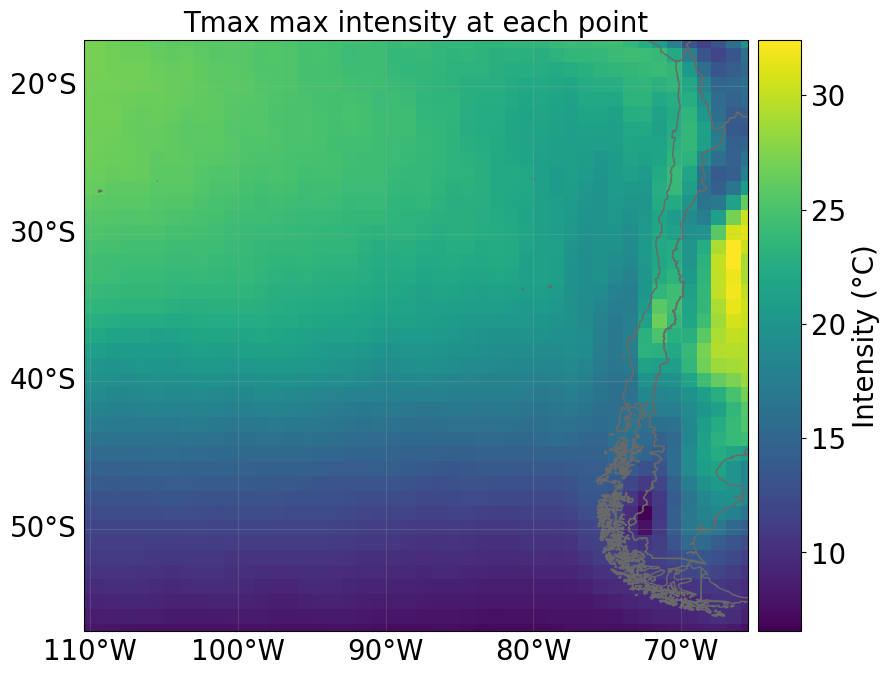

In [17]:
# load an example hazard
initiation_month_str = f"{month_name_to_number(initiation_month[0]):02d}"
forecast_month_str = f"{handler.valid_period_str[-2:]}"  # Last month in valid period
forecast_year =  year_list[0]
if int(initiation_month_str) > int(forecast_month_str):
    forecast_year += 1  # Forecast extends to the next year

# Load the hazard and plot intensity for the selected grid, maximized over ensemble
path_to_hazard = handler.get_pipeline_path(forecast_year, initiation_month_str, "hazard")
haz = Hazard.from_hdf5(path_to_hazard)

if haz:
    available_dates = sorted(set(haz.date))  # Remove duplicates and sort
    readable_dates = [dt.datetime.fromordinal(d).strftime('%Y-%m-%d') for d in available_dates] # Convert ordinal dates to ISO 8601 date format (YYYY-MM-DD)
    print("Available Dates Across Members:", readable_dates)  # Print only unique dates

    # Find the closest date in the dataset
    target_date = dt.datetime(forecast_year, int(forecast_month_str), 1).toordinal()
    closest_date = min(available_dates, key=lambda x: abs(x - target_date))
    closest_date_str = dt.datetime.fromordinal(closest_date).strftime('%Y-%m-%d')

    # Plot intensity for the selected event
    print(f"Selected Date for Plotting: {closest_date_str}")
    haz.select(date=[closest_date, closest_date]).plot_intensity(event=0, smooth=False)
else:
    print("No hazard data found for the selected period.")